<a href="https://colab.research.google.com/github/esnue/ThesisAllocationSystem/blob/main/4_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of CTM output results
In this notebook, we will visualize our CTM output. 

## Import what we need

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.colors as mcolors

## Data
Let's import the dataframe that holds all of the relevant CTM outputs for our corpus of academic papers. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
topics_df = pd.read_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label.csv')

print(topics_df.sample(5))
print("There are ", len(topics_df.topic_id.unique()), "topics in total.")

                 prof  ...                                       distribution
390         mena6.txt  ...  [0.060654466920823324, 0.031215427769348027, 0...
208   Hallerberg8.txt  ...  [0.021933054889086635, 0.02581422789953649, 0....
719      shaikh16.txt  ...  [0.007526279558078386, 0.6800561770796776, 0.0...
481     Iacovone3.txt  ...  [0.00979663267498836, 0.010827216855250298, 0....
639  Hallerberg33.txt  ...  [0.01323842165293172, 0.015342890948522836, 0....

[5 rows x 4 columns]
There are  14 topics in total.


## Create wide & long format

In [37]:
# Extract list of topic proportions 
list_prop = topics_df.iloc[:,3]

# Convert to float array
ar_float = np.array([[float(i) for i in j[1:-1].split(', ')] for j in list_prop])

# Create col labels 
topics = []
for i in list(range(0, 14)):
     topics.append('Topic' + str(i))

# Add col labels to float array
topiclab_df = pd.DataFrame(data = ar_float, columns=topics)
topiclab_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13
0,0.020175,0.020572,0.014215,0.020098,0.030809,0.053812,0.040005,0.222704,0.458282,0.015613,0.009079,0.023006,0.040655,0.030977
1,0.026645,0.035498,0.025668,0.029616,0.045977,0.170333,0.019539,0.210636,0.127185,0.069739,0.039297,0.022049,0.132195,0.045623
2,0.033758,0.047051,0.304909,0.008178,0.012099,0.021066,0.137033,0.026668,0.047582,0.237065,0.033213,0.052527,0.027559,0.011292
3,0.024817,0.013010,0.027347,0.045821,0.052279,0.198748,0.015015,0.168231,0.221075,0.062478,0.015118,0.026495,0.080936,0.048630
4,0.022026,0.030046,0.021599,0.038057,0.026429,0.128352,0.023035,0.357937,0.191163,0.053320,0.019422,0.025729,0.039911,0.022974


In [38]:
# Change col name 
topics_df.rename(columns={"topic": "topic_words"}, inplace = True)

# Append wide format to topics_df
topics_df_wide = pd.concat([topics_df.iloc[:, 0:3], topiclab_df], axis = 1)

# Reshape to long format
topics_df_long = topics_df_wide.melt(id_vars = ['prof', 'topic_id', 'topic_words'],
                                     var_name = 'topic',
                                     value_name = 'topic_prop')

In [39]:
print("This is the wide format.\n", topics_df_wide.head(5))
print("This is the long format.\n", topics_df_long.head(5))

This is the wide format.
                 prof  topic_id  ...   Topic12   Topic13
0  Hammerschmid1.txt         8  ...  0.040655  0.030977
1  Hammerschmid2.txt         7  ...  0.132195  0.045623
2  Hammerschmid3.txt         2  ...  0.027559  0.011292
3  Hammerschmid4.txt         8  ...  0.080936  0.048630
4  Hammerschmid5.txt         7  ...  0.039911  0.022974

[5 rows x 17 columns]
This is the long format.
                 prof  topic_id  ...   topic topic_prop
0  Hammerschmid1.txt         8  ...  Topic0   0.020175
1  Hammerschmid2.txt         7  ...  Topic0   0.026645
2  Hammerschmid3.txt         2  ...  Topic0   0.033758
3  Hammerschmid4.txt         8  ...  Topic0   0.024817
4  Hammerschmid5.txt         7  ...  Topic0   0.022026

[5 rows x 5 columns]


In [ ]:
# Save wide and long formats 
topics_df_wide.to_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label_wide.csv', index = False)
topics_df_wide.to_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label_long.csv', index = False)

## Stacked Bar Chart

In [40]:
topics_df_wide.iloc[:, 4:31]

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13
0,0.020572,0.014215,0.020098,0.030809,0.053812,0.040005,0.222704,0.458282,0.015613,0.009079,0.023006,0.040655,0.030977
1,0.035498,0.025668,0.029616,0.045977,0.170333,0.019539,0.210636,0.127185,0.069739,0.039297,0.022049,0.132195,0.045623
2,0.047051,0.304909,0.008178,0.012099,0.021066,0.137033,0.026668,0.047582,0.237065,0.033213,0.052527,0.027559,0.011292
3,0.013010,0.027347,0.045821,0.052279,0.198748,0.015015,0.168231,0.221075,0.062478,0.015118,0.026495,0.080936,0.048630
4,0.030046,0.021599,0.038057,0.026429,0.128352,0.023035,0.357937,0.191163,0.053320,0.019422,0.025729,0.039911,0.022974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0.021399,0.021064,0.039322,0.037837,0.231681,0.037698,0.146472,0.225766,0.042759,0.026216,0.045092,0.062402,0.040566
805,0.030894,0.018797,0.058688,0.039525,0.042595,0.175584,0.102319,0.272929,0.041148,0.049103,0.066134,0.032175,0.040854
806,0.040224,0.055987,0.074573,0.040363,0.065862,0.093542,0.185981,0.103309,0.072010,0.079835,0.021580,0.057153,0.046390
807,0.025363,0.038191,0.091279,0.042163,0.033290,0.310931,0.092313,0.106162,0.066966,0.026474,0.073506,0.022411,0.044576


In [41]:
# Confirm percentage distribution by summing the percentages in each topic
topics_df_wide.iloc[:, 4:31].sum(axis=1) 

0      0.979825
1      0.973355
2      0.966242
3      0.975183
4      0.977974
         ...   
804    0.978272
805    0.970746
806    0.936811
807    0.973624
808    0.969592
Length: 809, dtype: float64

In [42]:
# Remove number and .txt from prof
topics_df_wide['prof'] = topics_df_wide['prof'].str.replace('[0-9]', '').str.replace('\.txt', '').str.upper()

# Create bar chart df 
bardat1 = pd.concat([topics_df_wide['prof'], topics_df_wide.iloc[:, 3:31]], axis = 1)

In [53]:
# Solution 1: Average topic proportions per professor 
bardat2 = bardat1.groupby('prof').mean().reset_index()
print(bardat2.head(5))

        prof    Topic0    Topic1  ...   Topic11   Topic12   Topic13
0    ANHEIER  0.041783  0.041402  ...  0.033235  0.075878  0.036825
1     BRYSON  0.042908  0.094299  ...  0.047043  0.032204  0.051637
2       CALI  0.013060  0.015328  ...  0.013967  0.010490  0.010630
3  CINGOLANI  0.065191  0.047997  ...  0.048372  0.077981  0.052651
4        CIS  0.153189  0.056211  ...  0.051490  0.122202  0.043669

[5 rows x 15 columns]


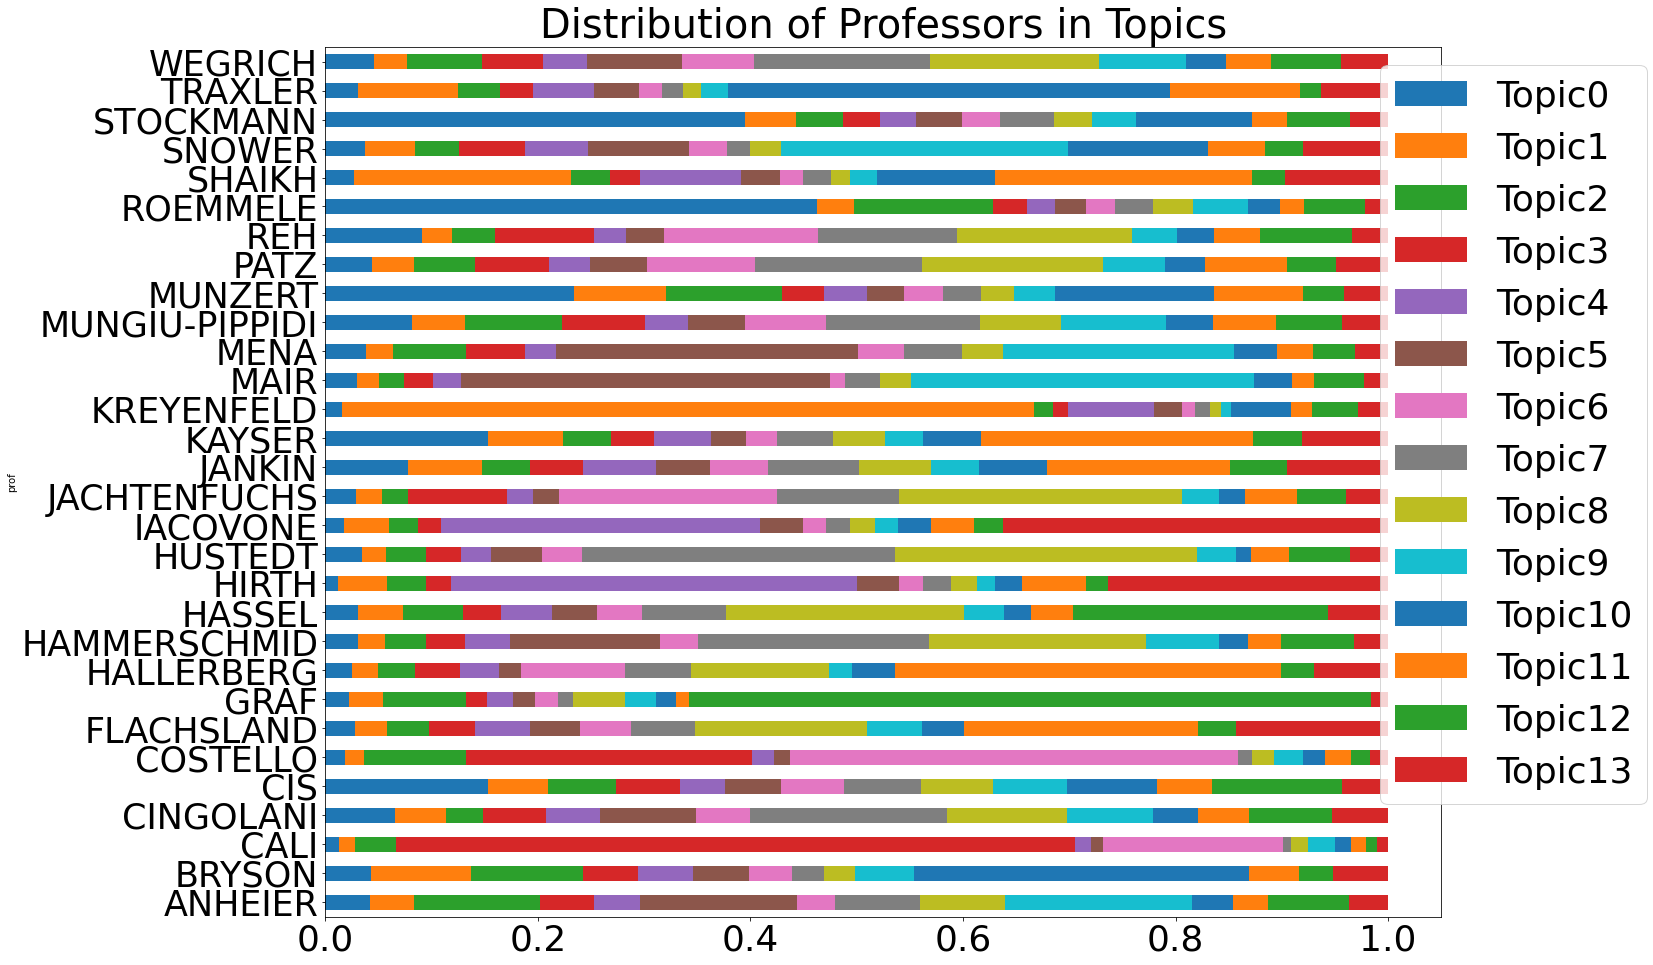

In [70]:
plt.rcParams["figure.figsize"] = [20,16]
bardat2.plot(
    x = 'prof',
    kind = 'barh',
    stacked = True,
    mark_right = True)
plt.title('Distribution of Professors in Topics', fontsize = 40)
plt.yticks(fontsize = 35)
plt.xticks(fontsize = 36)
plt.legend(fontsize = 36, loc = 'upper right', bbox_to_anchor=(1.2, 1))

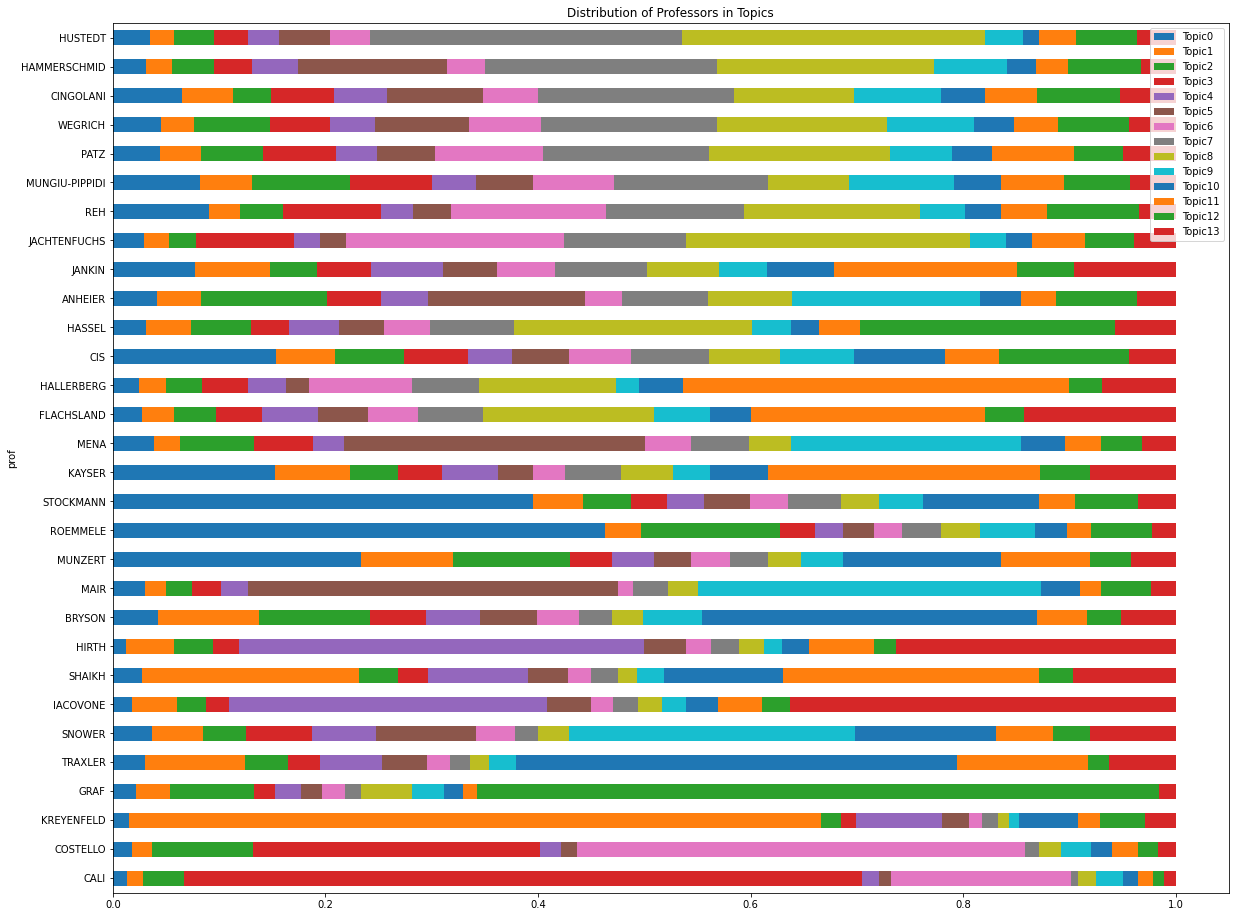

In [72]:
# Sort by topics
bardat2 = bardat2.sort_values('Topic7')
plt.rcParams["figure.figsize"] = [20,16]
bardat2.plot(
    x = 'prof',
    kind = 'barh',
    stacked = True,
    title = 'Distribution of Professors in Topics',
    mark_right = True)


## Bar Chart: Word Counts of Topic Keywords

In [47]:
topics_df_wide.head(5)

,prof,topic_id,topic_words,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13
0,HAMMERSCHMID,8,"['policy', 'actors', 'state', 'central', 'gove...",0.020175,0.020572,0.014215,0.020098,0.030809,0.053812,0.040005,0.222704,0.458282,0.015613,0.009079,0.023006,0.040655,0.030977
1,HAMMERSCHMID,7,"['public', 'government', 'state', 'administrat...",0.026645,0.035498,0.025668,0.029616,0.045977,0.170333,0.019539,0.210636,0.127185,0.069739,0.039297,0.022049,0.132195,0.045623
2,HAMMERSCHMID,2,"['october', 'neach', 'medium', 'otherwise', 'n...",0.033758,0.047051,0.304909,0.008178,0.012099,0.021066,0.137033,0.026668,0.047582,0.237065,0.033213,0.052527,0.027559,0.011292
3,HAMMERSCHMID,8,"['policy', 'actors', 'state', 'central', 'gove...",0.024817,0.013010,0.027347,0.045821,0.052279,0.198748,0.015015,0.168231,0.221075,0.062478,0.015118,0.026495,0.080936,0.048630
4,HAMMERSCHMID,7,"['public', 'government', 'state', 'administrat...",0.022026,0.030046,0.021599,0.038057,0.026429,0.128352,0.023035,0.357937,0.191163,0.053320,0.019422,0.025729,0.039911,0.022974


In [48]:
bardat = topics_df_wide.iloc[:, 1:3]
bardat.head(5)

,topic_id,topic_words
0,8,"['policy', 'actors', 'state', 'central', 'gove..."
1,7,"['public', 'government', 'state', 'administrat..."
2,2,"['october', 'neach', 'medium', 'otherwise', 'n..."
3,8,"['policy', 'actors', 'state', 'central', 'gove..."
4,7,"['public', 'government', 'state', 'administrat..."


In [49]:
# remove leading white space's & split by delimiter
bardat['topic_words'] = bardat['topic_words'].str.strip()\
    .str.replace(",\s+", ",")\
    .str.split(',')

# apply group by to get count of each word.
bardat2  = bardat.explode(column='topic_words').groupby(["topic_id","topic_words"]).size().reset_index(name='count')

In [50]:
bardat3 = bardat.groupby(['topic_id']).count().reset_index().rename(columns={"topic_words": "Count"})
bardat3.head(5)

,topic_id,Count
0,0,66
1,1,55
2,2,67
3,3,32
4,4,29


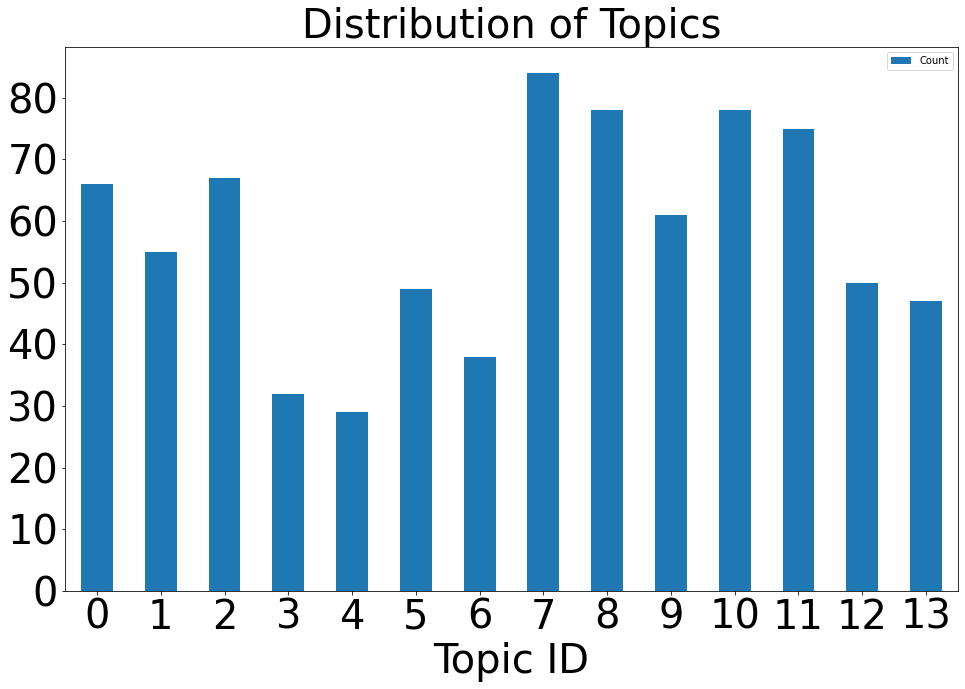

In [51]:
# Plot
plt.rcParams["figure.figsize"] = [16,10]
bardat3.plot(
    x = 'topic_id',
    kind = "bar",
    stacked = False,
    mark_right = True)
plt.xticks(rotation=0, fontsize = 40)
plt.xlabel('Topic ID', fontsize=40)
plt.title('Distribution of Topics', fontsize = 40)
plt.yticks(fontsize = 40)

plt.show()